In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pyquaternion import Quaternion
import math
import cv2
from tqdm import tqdm
from time import time

In [2]:
# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype=R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6


# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :

    assert(isRotationMatrix(R))
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    
    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [5]:
initialized = False
PATH = '/home/ruslan/datasets/predictions_cont/'
video_writer = None
traj = []
for bev_file, cam2world_file, velo2cam_file in zip(tqdm(np.sort(os.listdir(os.path.join(PATH, 'bev_probs/')))), \
                                                   np.sort(os.listdir(os.path.join(PATH, 'cam0_to_world/'))), \
                                                   np.sort(os.listdir(os.path.join(PATH, 'velo_to_cam0/')))):
    bev_map = np.load(f'{PATH}bev_probs/{bev_file}')
    T_cam2world = np.load(f'{PATH}cam0_to_world/{cam2world_file}')
    T_velo2cam = np.array([[ 0.04307104, -0.99900437, -0.01162549,  0.26234696],
                           [-0.08829286,  0.00778461, -0.99606414, -0.10763414],
                           [ 0.99516293,  0.04392797, -0.08786967, -0.82920525],
                           [ 0.,          0.,          0.,          1.        ],])
    T = T_velo2cam @ T_cam2world
    R, t = T[:3, :3], T[:3, 3]
    
    if not initialized:
        x0, y0, z0 = t
        initialized = True
        
    x, y, z = t  #t[0]-x0, t[1]-y0, t[2]-z0
    pose = np.array([x, y, z])
    traj.append(pose)
    
    roll, pitch, yaw = rotationMatrixToEulerAngles(R)

100%|██████████| 1000/1000 [00:00<00:00, 1035.62it/s]


In [12]:
T_velo2cam

array([[ 0.04307104, -0.99900437, -0.01162549,  0.26234696],
       [-0.08829286,  0.00778461, -0.99606414, -0.10763414],
       [ 0.99516293,  0.04392797, -0.08786967, -0.82920525],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

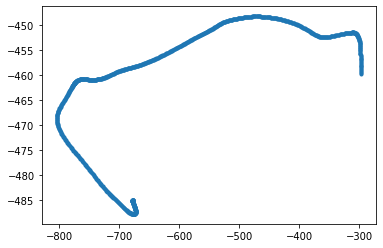

In [8]:
traj = np.array(traj)
plt.plot(traj[:,0], traj[:,1], '.')

In [9]:
np.min(traj[:,0]), np.max(traj[:,0])

(-804.0857284420015, -296.8542143444546)

In [10]:
np.min(traj[:,1]), np.max(traj[:,1])

(-487.75953841867283, -448.2888950186423)

In [11]:
np.min(traj[:,2]), np.max(traj[:,2])

(3243.4797715925833, 3774.9127712871355)

In [ ]:
traj.shape